# קורלציה 

In [71]:
import pandas as pd
path ='inputdata\Panel_06.csv'
df = pd.read_csv(path)

df = df.drop(columns=['Weighted_Total_annual_income_(£)'])


In [73]:



# סינון העמודות המספריות בלבד
numeric_df = df.select_dtypes(include=['number'])

# הנחת משתני המטרה (שנה בהתאם לשמות העמודות של משתני המטרה בקובץ שלך)
target_variables = ['AST_Prevalence', 'COPD_Prevalence']  # שנה לשמות הנכונים של משתני המטרה שלך

# חישוב קורלציות פירסון עבור כל העמודות המספריות עם משתני המטרה
correlations = numeric_df.corr(method='pearson')

# מציאת הקורלציות החיוביות והשליליות ביותר עבור כל משתנה מטרה
for target in target_variables:
    target_correlations = correlations[target].drop(labels=target).sort_values()
    top_positive_correlations = target_correlations.tail(30)
    top_negative_correlations = target_correlations.head(30)
    
    print(f'Positive correlations with {target}:')
    print(top_positive_correlations)
    print(f'Negative correlations with {target}:')
    print(top_negative_correlations)
    print('-------------------------------------')

Positive correlations with AST_Prevalence:
Female_45_49                                                                                          0.119428
Male_50_54                                                                                            0.119615
Female_50_54                                                                                          0.158654
Male_55_59                                                                                            0.160293
Weighted_ParksAndPlayingFields_Average_distance_to_nearest_Park_Public_Garden_or_Playing_Field_(m)    0.167214
COPD005(percent)                                                                                      0.171823
Weighted_Houses_Average_size_of_private_outdoor_space_(m2)                                            0.176762
COPD007(percent)                                                                                      0.179444
Female_55_59                                                         

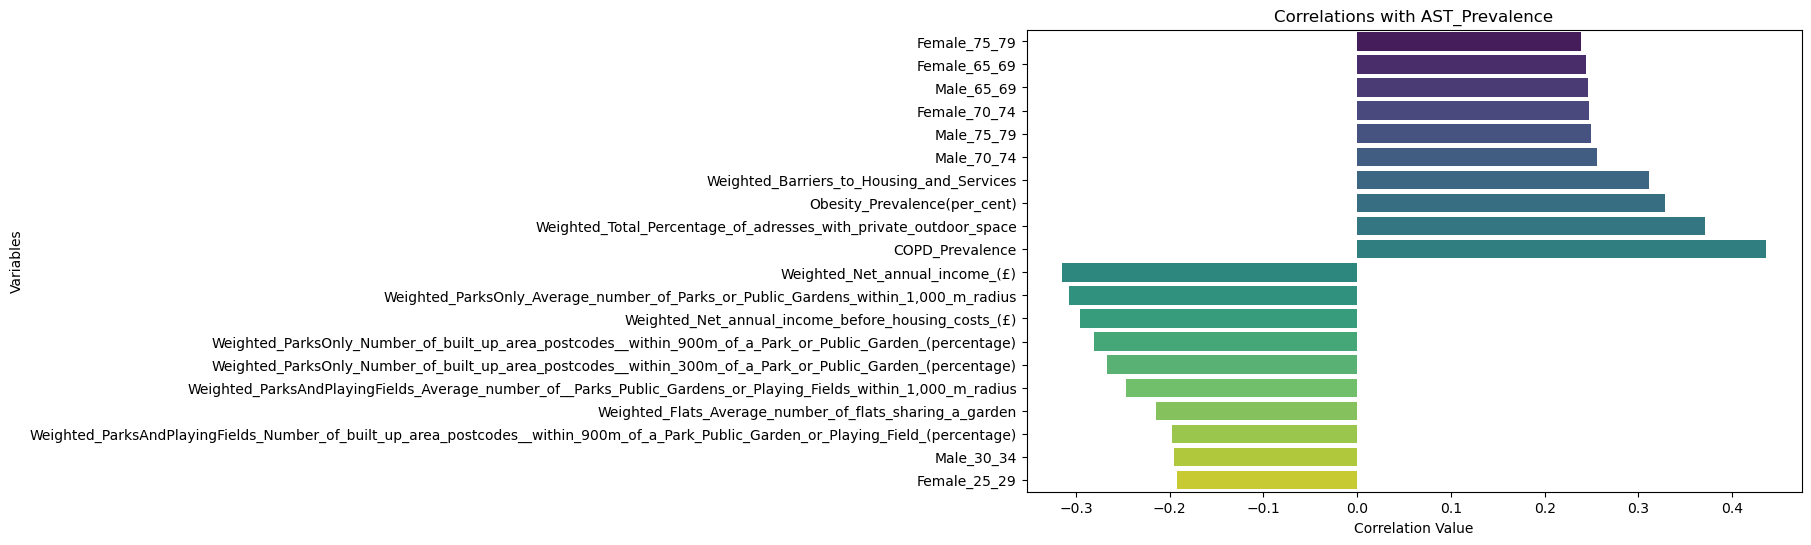

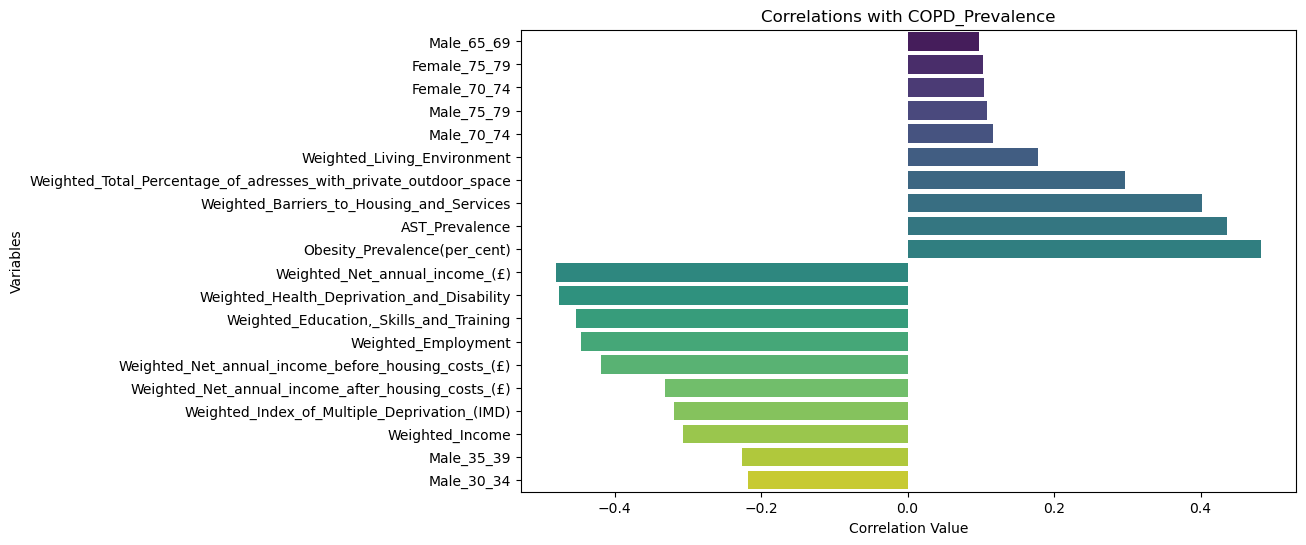

In [61]:
# תצוגה גרפית של הקורלציות הגבוהות והנמוכות ביותר לכל משתנה מטרה
for target in target_variables:
    target_correlations = correlations[target].drop(labels=target).sort_values()
    top_correlations = pd.concat([target_correlations.tail(10), target_correlations.head(10)])

    # תצוגה גרפית באמצעות seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_correlations.values, y=top_correlations.index, palette="viridis")
    plt.title(f'Correlations with {target}')
    plt.xlabel('Correlation Value')
    plt.ylabel('Variables')
    plt.show()


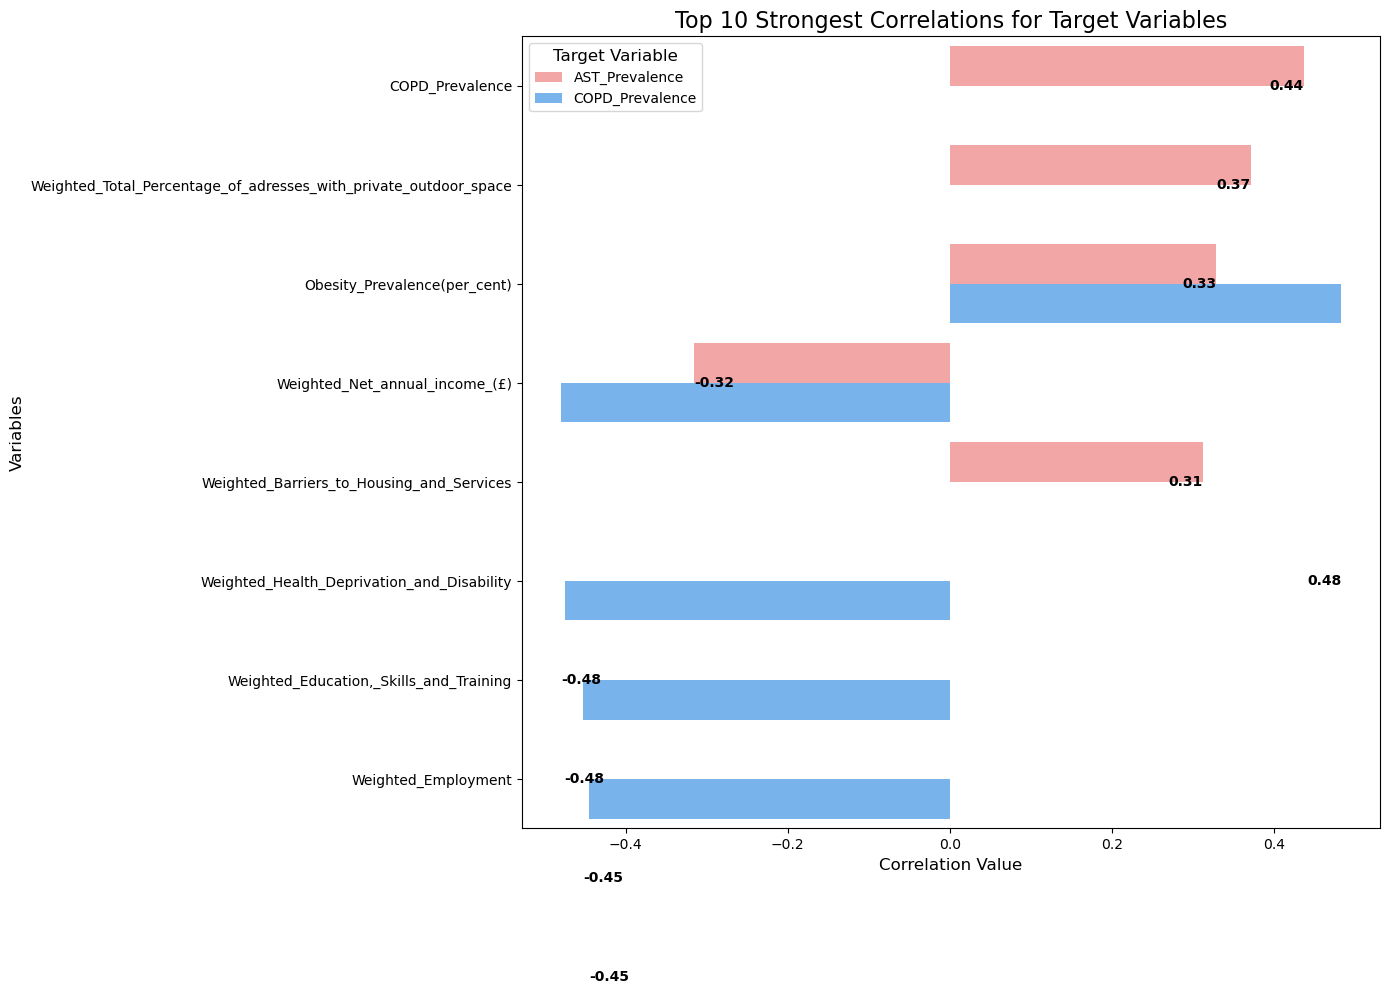

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# יצירת dataframe מאוחד לכל הקורלציות
combined_correlations = pd.DataFrame()

for target in target_variables:
    target_correlations = correlations[target].drop(labels=target)
    # בחירת 10 הקורלציות החזקות ביותר (חיוביות או שליליות)
    top_correlations = target_correlations.abs().nlargest(5)
    top_correlations = target_correlations[top_correlations.index]
    
    combined = top_correlations.reset_index()
    combined.columns = ['Variable', 'Correlation']
    combined['Target'] = target
    combined_correlations = pd.concat([combined_correlations, combined])

# יצירת הגרף
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Correlation', y='Variable', hue='Target', data=combined_correlations, palette=['#ff9999', '#66b3ff'])

plt.title('Top 10 Strongest Correlations for Target Variables', fontsize=16)
plt.xlabel('Correlation Value', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.legend(title='Target Variable', title_fontsize='12', fontsize='10')

# הוספת ערכים מספריים לכל עמודה
for i, v in enumerate(combined_correlations['Correlation']):
    ax.text(v, i, f'{v:.2f}', va='center', fontweight='bold', 
            ha='left' if v < 0 else 'right',
            color='black' if abs(v) > 0.3 else 'white')

plt.tight_layout()
plt.show()

### GPT

In [17]:
translation_dict = {
    'AST_Prevalence': 'שכיחות COPD',
    'COPD_Prevalence': 'שכיחות אסטמה',
    'Obesity_Prevalence(per_cent)': 'שכיחות השמנת יתר (אחוזים)',
    'Weighted_Health_Deprivation_and_Disability': 'מחסור בריאותי ומוגבלות משוקללים',
    'Weighted_Net_annual_income_(£)': 'הכנסה שנתית נטו משוקללת (£)',
    'Weighted_ParksOnly_Average_number_of_Parks_or_Public_Gardens_within_1,000_m_radius' : 'מספר פארקים ברדיוס של 1000 מטר',
    'Weighted_Total_Percentage_of_adresses_with_private_outdoor_space': 'אחוז משוקלל של כתובות עם מרחב חיצוני פרטי',
}

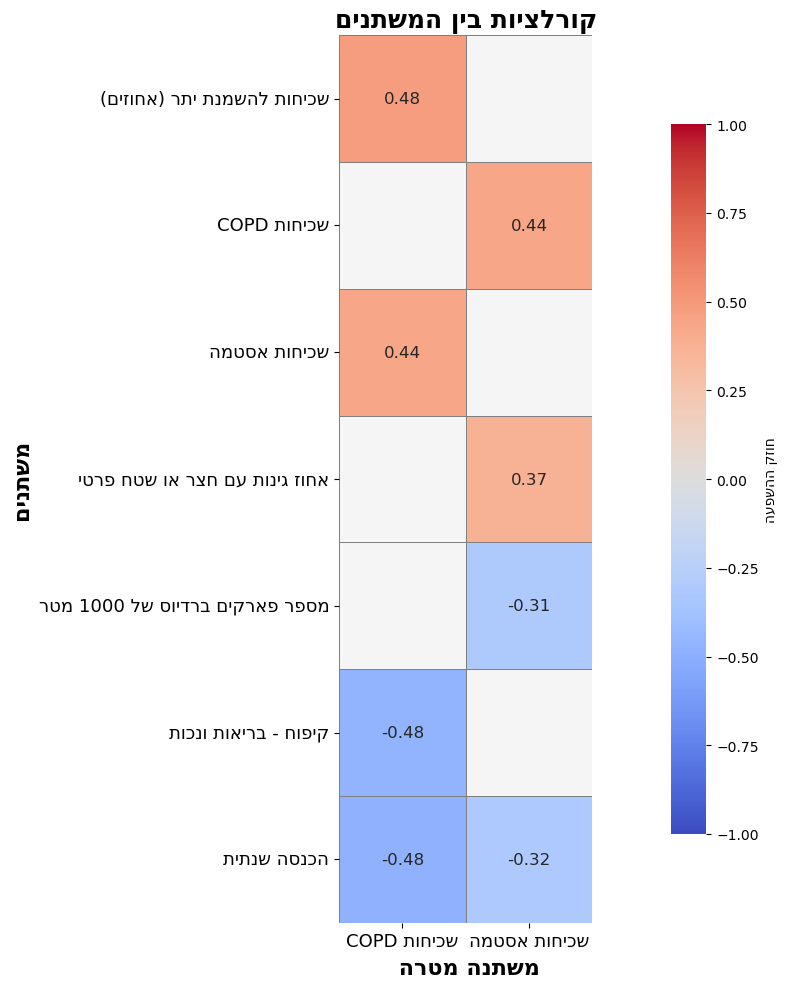

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from bidi.algorithm import get_display

# Filter numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Define target variables
target_variables = ['AST_Prevalence', 'COPD_Prevalence']

# Calculate Pearson correlations
correlations = numeric_df.corr(method='pearson')

# Initialize lists to store top correlations
top_correlations = pd.DataFrame()

# Get top positive and negative correlations for each target variable
for target in target_variables:
    target_correlations = correlations[target].drop(labels=target).sort_values()
    top_positive_correlations = target_correlations.tail(2)
    top_negative_correlations = target_correlations.head(2)
    
    # Combine positive and negative correlations
    top_combined = pd.concat([top_positive_correlations, top_negative_correlations])
    
    # Add target variable name as a column
    top_combined = top_combined.reset_index()
    top_combined.columns = ['Feature', 'Correlation']
    top_combined['Target'] = target
    
    # Append to the top_correlations DataFrame
    top_correlations = pd.concat([top_correlations, top_combined])

# Translate feature names and target variables
translation_dict = {
    'AST_Prevalence': get_display('שכיחות אסטמה'),
    'COPD_Prevalence': get_display('שכיחות COPD'),
    'Obesity_Prevalence(per_cent)': get_display('שכיחות להשמנת יתר (אחוזים)'),
    'Weighted_Health_Deprivation_and_Disability': get_display('קיפוח - בריאות ונכות'),
    'Weighted_Net_annual_income_(£)': get_display('הכנסה שנתית'),
    'Weighted_ParksOnly_Average_number_of_Parks_or_Public_Gardens_within_1,000_m_radius': get_display('מספר פארקים ברדיוס של 1000 מטר'),
    'Weighted_Total_Percentage_of_adresses_with_private_outdoor_space': get_display('אחוז גינות עם חצר או שטח פרטי'),
}

top_correlations['Feature_Hebrew'] = top_correlations['Feature'].map(translation_dict)
top_correlations['Target_Hebrew'] = top_correlations['Target'].map(translation_dict)

# Plot heatmap
plt.figure(figsize=(16, 10))
heatmap_data = top_correlations.pivot(index='Feature_Hebrew', columns='Target_Hebrew', values='Correlation')

# Customize the heatmap
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    fmt=".2f", 
    vmin=-1, 
    vmax=1, 
    linewidths=0.5, 
    linecolor='gray',
    cbar_kws={'label': get_display('חוזק ההשפעה'), 'shrink': 0.8},
    square=True,
    annot_kws={'size': 12}
)

# Set the background color
ax.set_facecolor('whitesmoke')  # Light grayish background color

# Customize plot titles and labels
plt.title(get_display('קורלציות בין המשתנים'), fontsize=18, weight='bold')
plt.xlabel(get_display('משתנה מטרה '), fontsize=16, weight='bold')
plt.ylabel(get_display('משתנים'), fontsize=16, weight='bold')

# Increase font size for x and y axis tick labels
ax.tick_params(axis='both', labelsize=13)

# Show the plot
plt.tight_layout()
plt.show()


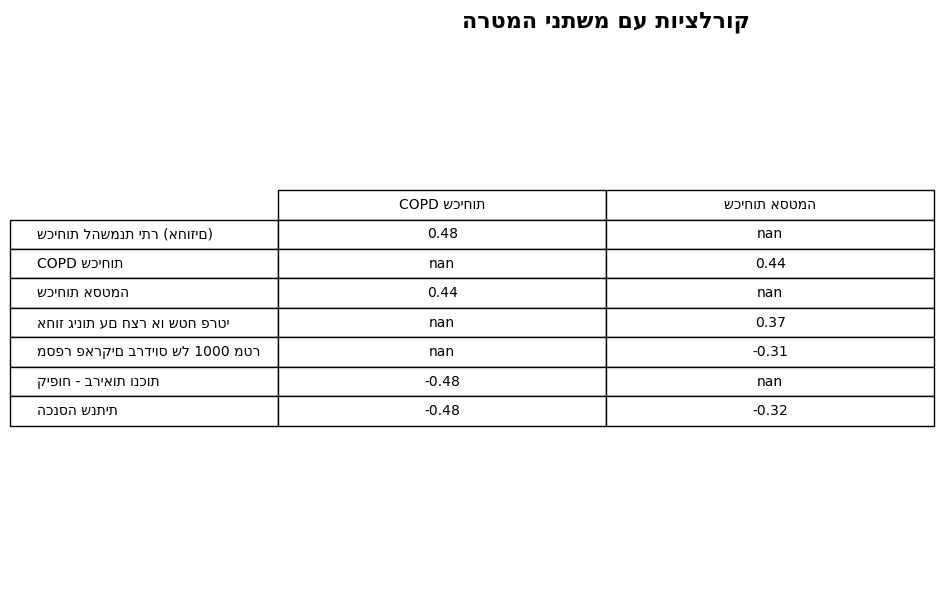

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display

# נניח שיש לנו את ה-DataFrame 'top_correlations' מהקוד הקודם

# נסדר את הנתונים
table_data = top_correlations.pivot(index='Feature_Hebrew', columns='Target_Hebrew', values='Correlation')

# נעגל את הערכים לשתי ספרות אחרי הנקודה העשרונית
table_data = table_data.round(2)

# ניצור את הטבלה
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=table_data.values,
                 rowLabels=[get_display(x) for x in table_data.index],
                 colLabels=[get_display(x) for x in table_data.columns],
                 cellLoc='center',
                 loc='center')

# נעצב את הטבלה
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# נוסיף כותרת
plt.title(get_display('קורלציות עם משתני המטרה'), fontsize=16, weight='bold')

plt.tight_layout()
plt.show()

### קלאד

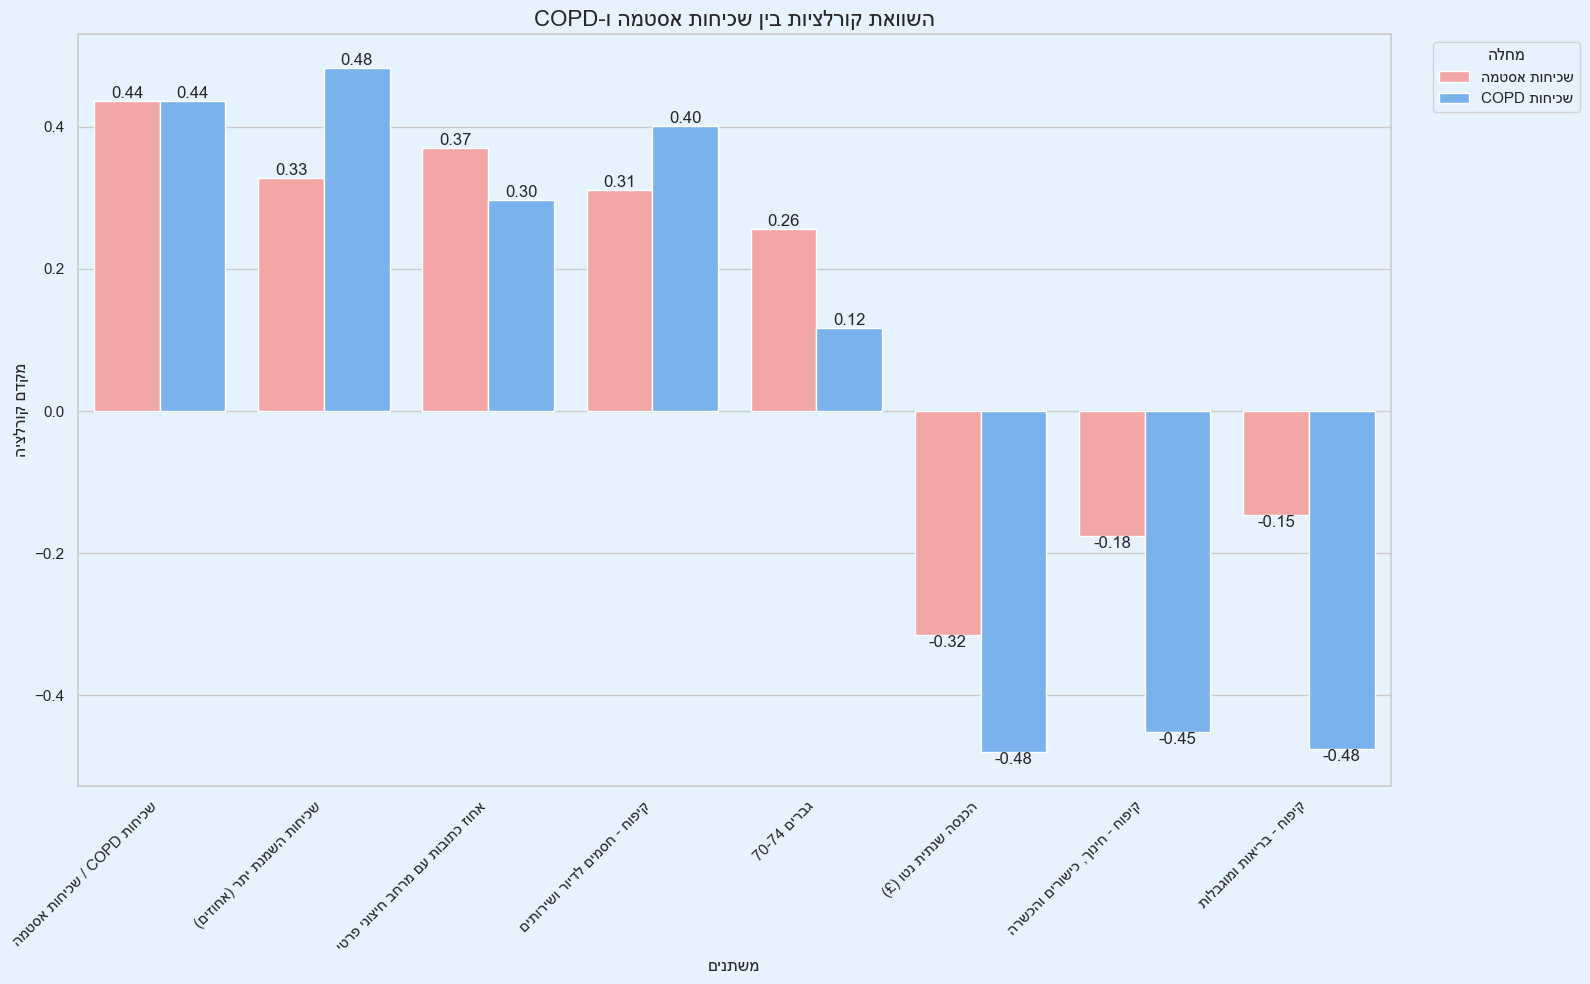

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display

# יצירת הנתונים
data = {
    'משתנה': [
        'שכיחות COPD / שכיחות אסטמה',
        'שכיחות השמנת יתר (אחוזים)',
        'אחוז כתובות עם מרחב חיצוני פרטי',
        'קיפוח - חסמים לדיור ושירותים',
        'גברים 70-74',
        'הכנסה שנתית נטו (£)',
        'קיפוח - חינוך, כישורים והכשרה',
        'קיפוח - בריאות ומוגבלות'
    ],
    'שכיחות אסטמה': [0.436369, 0.328643, 0.370718, 0.311642, 0.255783, -0.315170, -0.176216, -0.146776],
    'שכיחות COPD': [0.436369, 0.482167, 0.297059, 0.401515, 0.117169, -0.479538, -0.452282, -0.475156]
}

# יצירת DataFrame
df = pd.DataFrame(data)

# יצירת תרשים עם רקע כחול בהיר
plt.figure(figsize=(16, 10), facecolor='#E6F3FF')  # רקע כחול בהיר
sns.set(style="whitegrid", rc={'axes.facecolor':'#E6F3FF'})

# יצירת תרשים עמודות
ax = sns.barplot(x='משתנה', y='value', hue='variable', 
                 data=pd.melt(df, ['משתנה']), 
                 palette=['#FF9999', '#66B2FF'])

# סיבוב תוויות ציר x והוספת תמיכה בעברית
plt.xticks(rotation=45, ha='right')
ax.set_xticklabels([get_display(label.get_text()) for label in ax.get_xticklabels()])

# הוספת כותרות עם תמיכה בעברית
plt.title(get_display('השוואת קורלציות בין שכיחות אסטמה ו-COPD'), fontsize=16)
plt.xlabel(get_display('משתנים'), fontsize=12)
plt.ylabel(get_display('מקדם קורלציה'), fontsize=12)

# הוספת ערכים מעל העמודות
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge')

# שינוי תוויות המקרא לעברית והעברתו לצד ימין למעלה
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [get_display('שכיחות אסטמה'), get_display('שכיחות COPD')], 
          title=get_display('מחלה'), loc='upper right', bbox_to_anchor=(1.15, 1))

# התאמת המרווחים
plt.tight_layout()

# הצגת התרשים
plt.show()

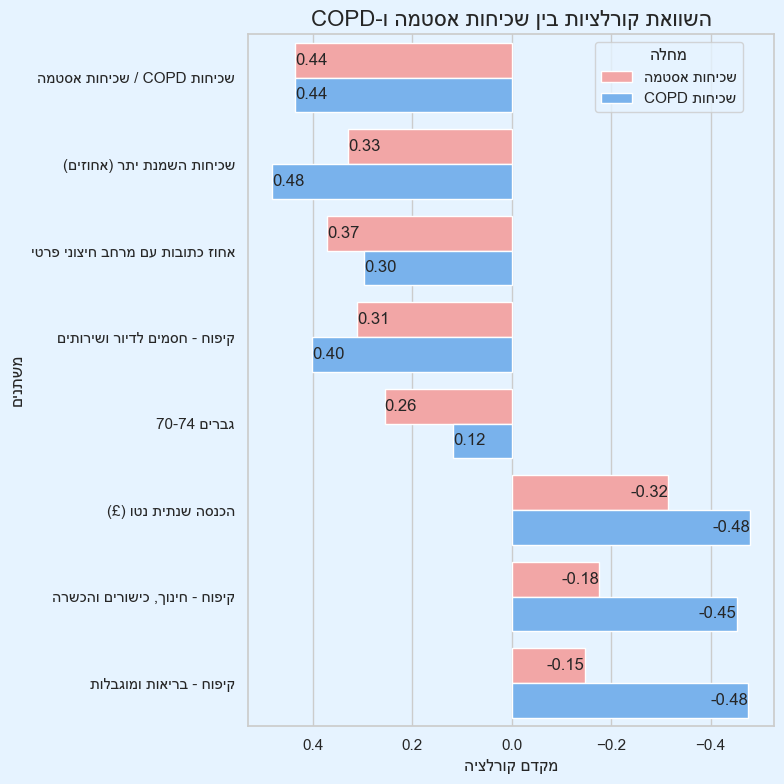

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display

# יצירת הנתונים
data = {
    'משתנה': [
        'שכיחות COPD / שכיחות אסטמה',
        'שכיחות השמנת יתר (אחוזים)',
        'אחוז כתובות עם מרחב חיצוני פרטי',
        'קיפוח - חסמים לדיור ושירותים',
        'גברים 70-74',
        'הכנסה שנתית נטו (£)',
        'קיפוח - חינוך, כישורים והכשרה',
        'קיפוח - בריאות ומוגבלות'
    ],
    'שכיחות אסטמה': [0.436369, 0.328643, 0.370718, 0.311642, 0.255783, -0.315170, -0.176216, -0.146776],
    'שכיחות COPD': [0.436369, 0.482167, 0.297059, 0.401515, 0.117169, -0.479538, -0.452282, -0.475156]
}

# יצירת DataFrame
df = pd.DataFrame(data)

# יצירת תרשים עם רקע כחול בהיר
plt.figure(figsize=(8, 8), facecolor='#E6F3FF')  # שינוי גודל התרשים
sns.set(style="whitegrid", rc={'axes.facecolor':'#E6F3FF'})

# יצירת תרשים עמודות אופקי
ax = sns.barplot(y='משתנה', x='value', hue='variable', 
                 data=pd.melt(df, ['משתנה']), 
                 palette=['#FF9999', '#66B2FF'],
                 orient='h')  # שינוי לתרשים אופקי

# הוספת תמיכה בעברית לתוויות ציר y
ax.set_yticklabels([get_display(label.get_text()) for label in ax.get_yticklabels()])

# הוספת כותרות עם תמיכה בעברית
plt.title(get_display('השוואת קורלציות בין שכיחות אסטמה ו-COPD'), fontsize=16)
plt.ylabel(get_display('משתנים'), fontsize=12)
plt.xlabel(get_display('מקדם קורלציה'), fontsize=12)

# הוספת ערכים ליד העמודות
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge')

# שינוי תוויות המקרא לעברית והעברתו לחלק העליון
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [get_display('שכיחות אסטמה'), get_display('שכיחות COPD')], 
          title=get_display('מחלה'), loc='upper center', bbox_to_anchor=(0.8, 1),
          ncol=1)  # שימוש ב-ncol=2 להצגת המקרא בשורה אחת

# הפיכת סדר הערכים בציר x כך שהחיובי יהיה בימין
plt.gca().invert_xaxis()

# התאמת המרווחים
plt.tight_layout()

# הצגת התרשים
plt.show()

# אחר 

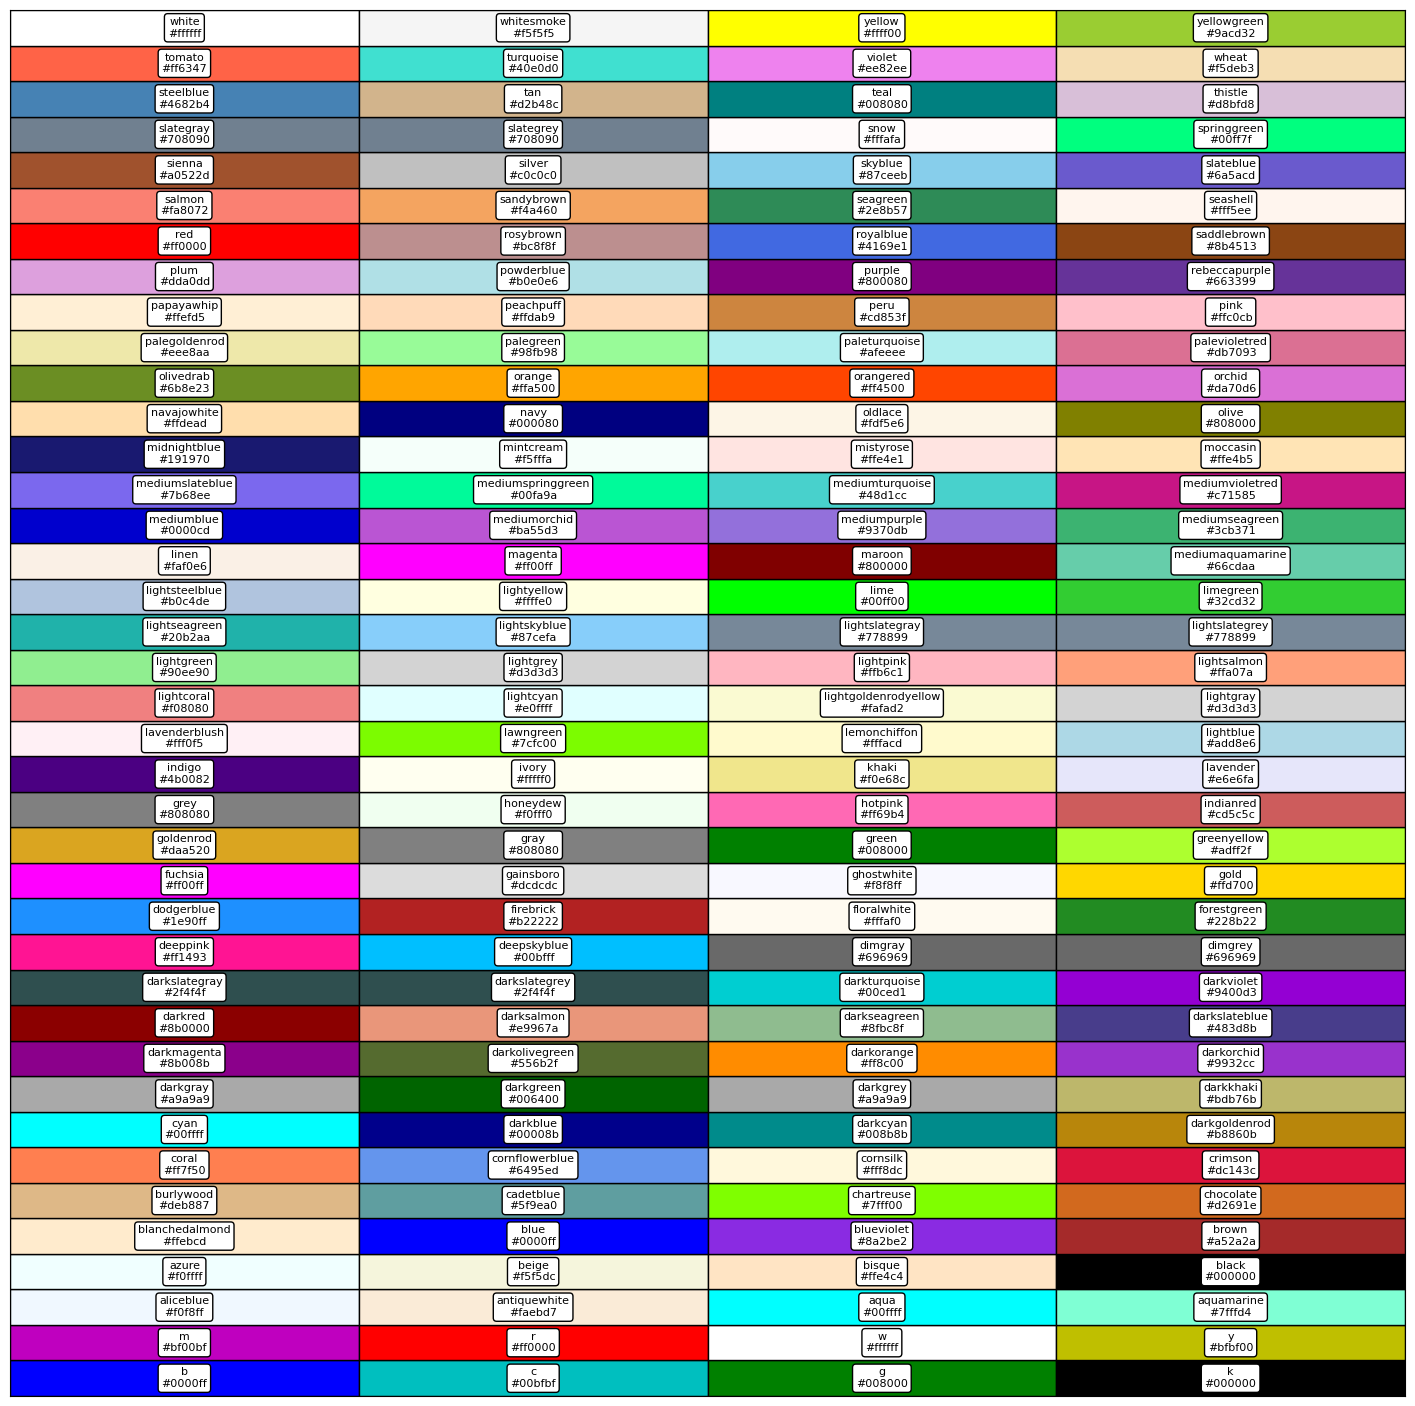

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get all the base colors and CSS4 colors from matplotlib
base_colors = mcolors.BASE_COLORS
css4_colors = mcolors.CSS4_COLORS

# Sort colors by name
sorted_base_colors = sorted(base_colors.items(), key=lambda x: x[0])
sorted_css4_colors = sorted(css4_colors.items(), key=lambda x: x[0])

# Combine sorted colors
sorted_colors = sorted_base_colors + sorted_css4_colors

# Plotting
fig, ax = plt.subplots(figsize=(18, 18))

# Number of colors
n = len(sorted_colors)
n_cols = 4  # Number of columns to display colors
n_rows = n // n_cols + (n % n_cols > 0)

# Create the plot
for i, (name, color) in enumerate(sorted_colors):
    row = i // n_cols
    col = i % n_cols
    y = row / n_rows
    x = col / n_cols

    hex_color = mcolors.to_hex(color)
    text = f"{name}\n{hex_color}"
    
    ax.text(x + 0.5 / n_cols, y + 0.5 / n_rows, text, ha='center', va='center', fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    ax.add_patch(plt.Rectangle((x, y), 1 / n_cols, 1 / n_rows, edgecolor='black', facecolor=color))

# Hide axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()
